In [1]:
import numpy as np
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sb
%matplotlib inline

In [ ]:
mf_cp = pd.read_csv('recipes_muffins_cupcakes.csv')
mf_cp.head()

In [110]:
from sklearn.model_selection import train_test_split

X, y = mf_cp[['Flour', 'Sugar', 'Milk']], mf_cp[['Type']]
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print("Shape of X_train = ", X_train.shape)
print("Shape of X_test = ", X_test.shape)

Shape of X_train =  (16, 3)
Shape of X_test =  (4, 3)


In [111]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print(np.column_stack((y_pred, y_test)))

[['Cupcake' 'Cupcake']
 ['Muffin' 'Muffin']
 ['Cupcake' 'Cupcake']
 ['Muffin' 'Muffin']]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

1.0


In [73]:
df = pd.read_csv('price.csv')
df.head()

,sequence,price
0,2,68.250000
1,3,67.300003
2,4,67.980003
3,7,67.690002
4,8,67.820000


In [83]:
# Do not use train_test_split as it will randomise the data
# For time series data we do not want to randomize the data
# Correctly defining train and test

train_arr = np.arange(0, 15)
test_arr = np.arange(15, 20)
print("Train element selected ", train_arr)
print("Test element selected ", test_arr)

Train element selected  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Test element selected  [15 16 17 18 19]


In [84]:
X_train, X_test, y_train, y_test = df['sequence'][train_arr], df['sequence'][test_arr], df['price'][train_arr], df['price'][test_arr]
print("Length of X_train = ", len(X_train))
print("Length of X_test = ", len(X_test))

Length of X_train =  15
Length of X_test =  5


In [0]:
def predict_prices(dates, prices):
    # dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    # x = np.reshape(x,(len(x), 1))
    dates = np.expand_dims(dates, axis=1)
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf, svr_lin, svr_poly

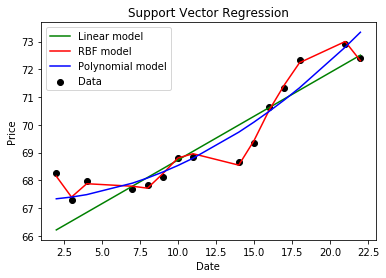

In [78]:
svr_rbf, svr_lin, svr_poly = predict_prices(X_train, y_train)

In [79]:
y_pred = svr_rbf.predict(np.expand_dims(X_test, axis=1))
print(np.column_stack((y_pred, y_test)))

[[71.61001659 72.19999695]
 [71.06302225 72.66000366]
 [70.66118636 72.83000183]
 [70.12643693 73.16999817]
 [70.09348053 73.70999908]]


In [80]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

5.988931698942966
